In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.colors as colors
import matplotlib as mpl

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.family'] = ['serif']
plt.rcParams.update({'font.size': 20})

In [2]:
# Define the size of the grid
grid_size = 100
x = np.linspace(-1.7, 1.3, grid_size)
y = np.linspace(-0.4, 2.1, grid_size)

# Create the grid
X, Y = np.meshgrid(x, y)

# Define your function to calculate the scalar potential
def scalar_potential2(x, y):
    # For example, let's use a simple function like a Gaussian distribution
    #return 2 * x**2 - y**2
    return ((1 - x**2 - y**2)**2 + (y**2 / (x**2 + y**2))) * (1 + (1 / (1 + np.exp(-y))))

# Define your function to calculate the scalar potential
def scalar_potential(x, y):
    # For example, let's use a simple function like a Gaussian distribution
    #return 2 * x**2 - y**2
    #return ((1 - x**2 - y**2)**2 + (y**2 / (x**2 + y**2))) * (1 + (1 / (1 + np.exp(-y))))
    t_1 = -200 * np.exp((-1.0)*(x - 1.0)**2 + ( 0.0)*(x - 1.0)*(y-0.0) + (-10.0)*(y-0.0)**2)
    t_2 = -100 * np.exp((-1.0)*(x - 0.0)**2 + ( 0.0)*(x - 0.0)*(y-0.5) + (-10.0)*(y-0.5)**2)
    t_3 = -170 * np.exp((-6.5)*(x + 0.5)**2 + (11.0)*(x + 0.5)*(y-1.5) + ( -6.5)*(y-1.5)**2)
    t_4 =   15 * np.exp(( 0.7)*(x + 1.0)**2 + ( 0.6)*(x + 1.0)*(y-1.0) + (  0.7)*(y-1.0)**2)
    
    return (t_1 + t_2 + t_3 + t_4)

# Calculate the scalar potential at each grid point
Z = scalar_potential(X, Y)

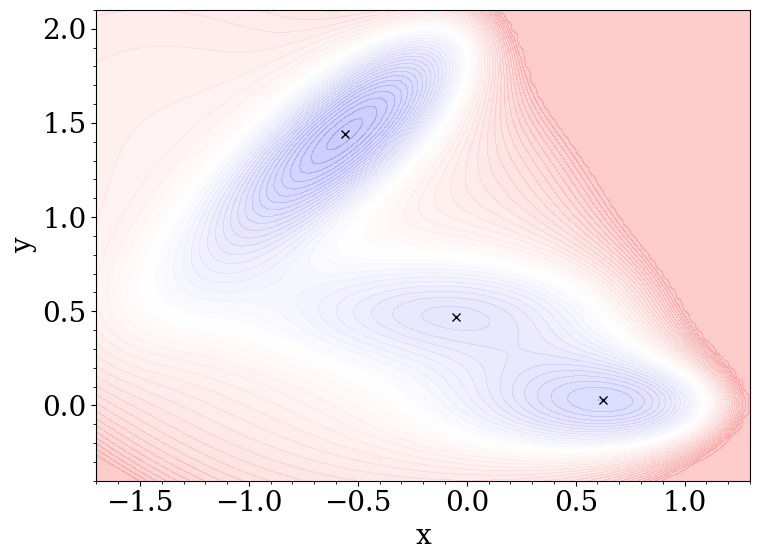

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 50, cmap='bwr', alpha = 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(-0.558, 1.442, 'x', color='black')
plt.plot(0.623, 0.028, 'x', color='black')
plt.plot(-0.050, 0.467, 'x', color='black')
plt.minorticks_on()
plt.tight_layout()
#plt.savefig('pes.png')
plt.show()

In [5]:
path = np.loadtxt('./neb_path.csv')

# Figure 2a

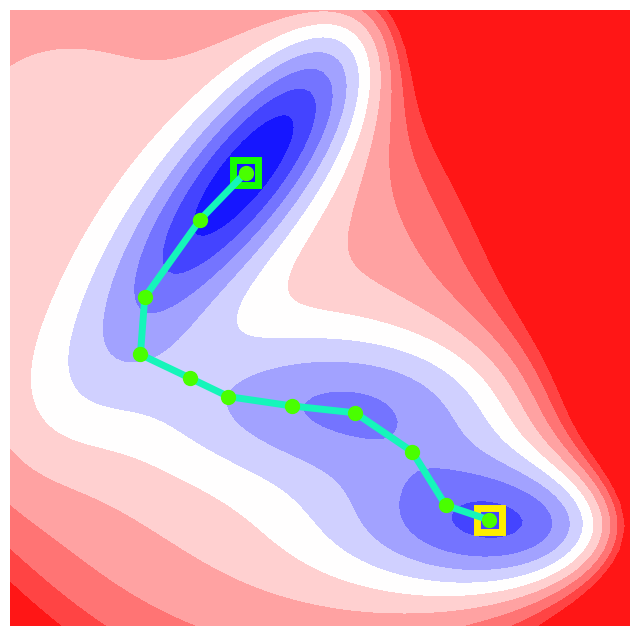

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 10, cmap='bwr')#, alpha = 0.2)

rect1 = mpl.patches.Rectangle((-0.62, 1.39), 0.12, 0.1, color='#16ff00', fc = 'none',lw = 5.0)
ax.add_patch(rect1)
rect1 = mpl.patches.Rectangle((0.56, -0.02), 0.12, 0.1, color='#ffed00', fc = 'none',lw = 5.0)
ax.add_patch(rect1)

plt.plot(path[:, 0], path[:, 1], color = "#15f5ba", zorder = 1, linewidth = 5.0)
plt.scatter(path[:, 0], path[:, 1], color = "#49ff00", zorder = 2, s = 100)

#plt.tight_layout()
plt.axis('off')
#plt.savefig('pes_path.png')
plt.show()

In [7]:
# Define the size of the grid
grid_size = 10
x = np.linspace(-1.7, 1.3, grid_size)
y = np.linspace(-0.4, 2.1, grid_size)

# Create the grid
X, Y = np.meshgrid(x, y)

# Define your function to calculate the scalar potential
def scalar_potential2(x, y):
    # For example, let's use a simple function like a Gaussian distribution
    #return 2 * x**2 - y**2
    return ((1 - x**2 - y**2)**2 + (y**2 / (x**2 + y**2))) * (1 + (1 / (1 + np.exp(-y))))

# Define your function to calculate the scalar potential
def scalar_potential(x, y):
    # For example, let's use a simple function like a Gaussian distribution
    #return 2 * x**2 - y**2
    #return ((1 - x**2 - y**2)**2 + (y**2 / (x**2 + y**2))) * (1 + (1 / (1 + np.exp(-y))))
    t_1 = -200 * np.exp((-1.0)*(x - 1.0)**2 + ( 0.0)*(x - 1.0)*(y-0.0) + (-10.0)*(y-0.0)**2)
    t_2 = -100 * np.exp((-1.0)*(x - 0.0)**2 + ( 0.0)*(x - 0.0)*(y-0.5) + (-10.0)*(y-0.5)**2)
    t_3 = -170 * np.exp((-6.5)*(x + 0.5)**2 + (11.0)*(x + 0.5)*(y-1.5) + ( -6.5)*(y-1.5)**2)
    t_4 =   15 * np.exp(( 0.7)*(x + 1.0)**2 + ( 0.6)*(x + 1.0)*(y-1.0) + (  0.7)*(y-1.0)**2)
    
    return (t_1 + t_2 + t_3 + t_4)

# Calculate the scalar potential at each grid point
Z = scalar_potential(X, Y)

In [8]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

Z_copy = Z.copy()
Z_copy[Z > 0] = 100
Z_copy[2, 7] = 40
Z_copy[7, 4] = 70
Z_copy[Z <= 0] = 0

path_maze = np.loadtxt('./maze_path.csv').astype(np.int64)

In [9]:
print(Z_copy)

[[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100.   0.   0.   0.   0. 100.]
 [100. 100. 100.   0.   0.   0.   0.   0.   0. 100.]
 [100.   0.   0.   0.   0.   0.   0.   0. 100. 100.]
 [100.   0.   0.   0.   0.   0.   0. 100. 100. 100.]
 [100.   0.   0.   0.   0. 100. 100. 100. 100. 100.]
 [100. 100.   0.   0.   0. 100. 100. 100. 100. 100.]
 [100. 100.   0.   0.   0.   0. 100. 100. 100. 100.]
 [100. 100. 100.   0.   0.   0. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]]


# Figure 2c

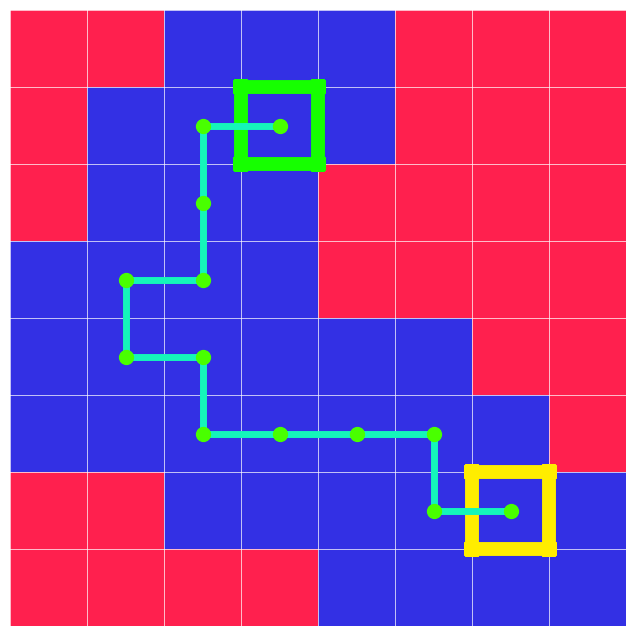

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = ["#3330e4", "#332fd0", "#332fd0", "#ff204e"]
my_cmap = ListedColormap(colors, name="my_cmap")

ax.matshow(Z_copy, cmap = my_cmap, interpolation='nearest')


plt.vlines([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], ymin = -0.5, ymax = 9.5, color = 'white', linewidth = 0.5, zorder = 0)
plt.hlines([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], xmin = -0.5, xmax = 9.5, color = 'white', linewidth = 0.5, zorder = 0)
plt.vlines([3.5, 4.5], ymin = 6.4, ymax = 7.6, color = '#16ff00', linewidth = 10.0, zorder = 0)
plt.hlines([6.5, 7.5], xmin = 3.4, xmax = 4.6, color = '#16ff00', linewidth = 10.0, zorder = 0)
plt.vlines([6.5, 7.5], ymin = 1.4, ymax = 2.6, color = '#ffed00', linewidth = 10.0, zorder = 0)
plt.hlines([1.5, 2.5], xmin = 6.4, xmax = 7.6, color = '#ffed00', linewidth = 10.0, zorder = 0)

plt.plot(path_maze[:, 0], path_maze[:, 1], color = "#15f5ba", zorder = 1, linewidth = 5.0)
plt.scatter(path_maze[:, 0], path_maze[:, 1], color = "#49ff00", zorder = 2, s = 100)
plt.axis('off')
plt.gca().invert_yaxis()

plt.xlim(0.5, 8.5)
plt.ylim(0.5, 8.5)
#plt.savefig('maze_binary.png')
plt.show()

[]

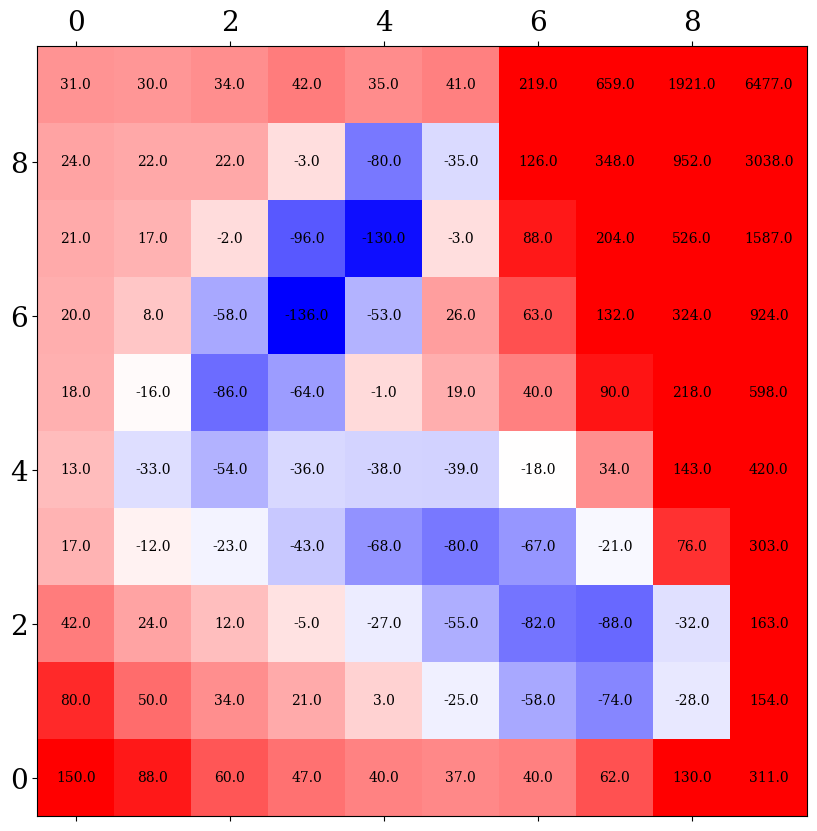

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(np.clip(Z, a_min = Z.min(), a_max = 100), cmap = 'bwr', interpolation='nearest')
for i in range(10):
    for j in range(10):
        c = np.round(Z[j,i])
        ax.text(i, j, str(c), va='center', ha='center', fontsize = 10)
plt.gca().invert_yaxis()
plt.plot()

# Figure 2d

In [12]:
import matplotlib.colors as colors

Z_copy = Z.copy()
min_val = Z_copy.min() + 10
Z_copy = np.clip(Z_copy, a_min = Z_copy.min(), a_max = 50) - min_val

grid_vals = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]

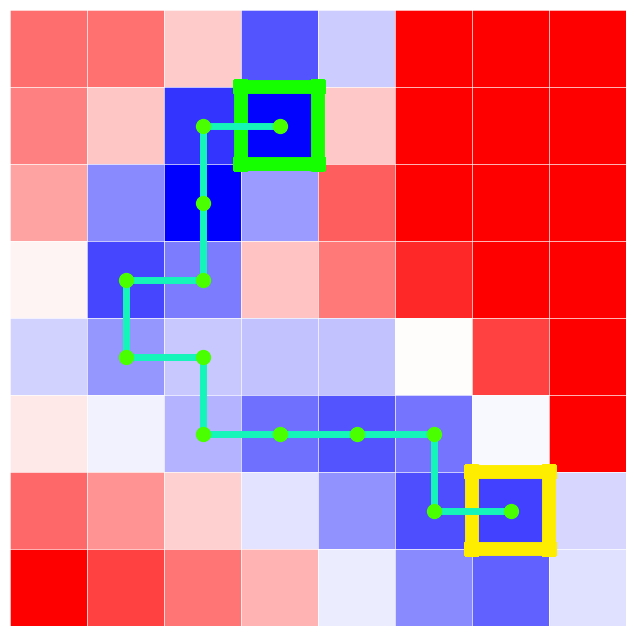

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))
ax.matshow(Z_copy, cmap = 'bwr', norm=colors.PowerNorm(gamma = 1.5), interpolation='nearest')

plt.vlines(grid_vals, ymin = -0.5, ymax = 9.5, color = 'white', linewidth = 0.5, zorder = 0)
plt.hlines(grid_vals, xmin = -0.5, xmax = 9.5, color = 'white', linewidth = 0.5, zorder = 0)

plt.vlines([3.5, 4.5], ymin = 6.4, ymax = 7.6, color = '#16ff00', linewidth = 10.0, zorder = 0)
plt.hlines([6.5, 7.5], xmin = 3.4, xmax = 4.6, color = '#16ff00', linewidth = 10.0, zorder = 0)
plt.vlines([6.5, 7.5], ymin = 1.4, ymax = 2.6, color = '#ffed00', linewidth = 10.0, zorder = 0)
plt.hlines([1.5, 2.5], xmin = 6.4, xmax = 7.6, color = '#ffed00', linewidth = 10.0, zorder = 0)

plt.plot(path_maze[:, 0], path_maze[:, 1], color = "#15f5ba", zorder = 1, linewidth = 5.0)
plt.scatter(path_maze[:, 0], path_maze[:, 1], color = "#49ff00", zorder = 2, s = 100)

plt.xlim(0.5, 8.5)
plt.ylim(0.5, 8.5)
plt.axis('off')
#plt.savefig('maze_discrete.png')
plt.show()

In [14]:
from scipy.interpolate import splrep, BSpline

profile = scalar_potential(path[:, 0], path[:, 1])
print(path.shape[0])
print(profile.shape[0])

tck_s = splrep(np.arange(path.shape[0]), profile, s = profile.shape[0])

x_new = np.arange(0, 10, 0.2)
rxn_profile = BSpline(*tck_s)(x_new)
path_maze_ = path_maze[[0,1,2,3,4,5,6,7,8,10,12], :] 

11
11


# Figure 2b

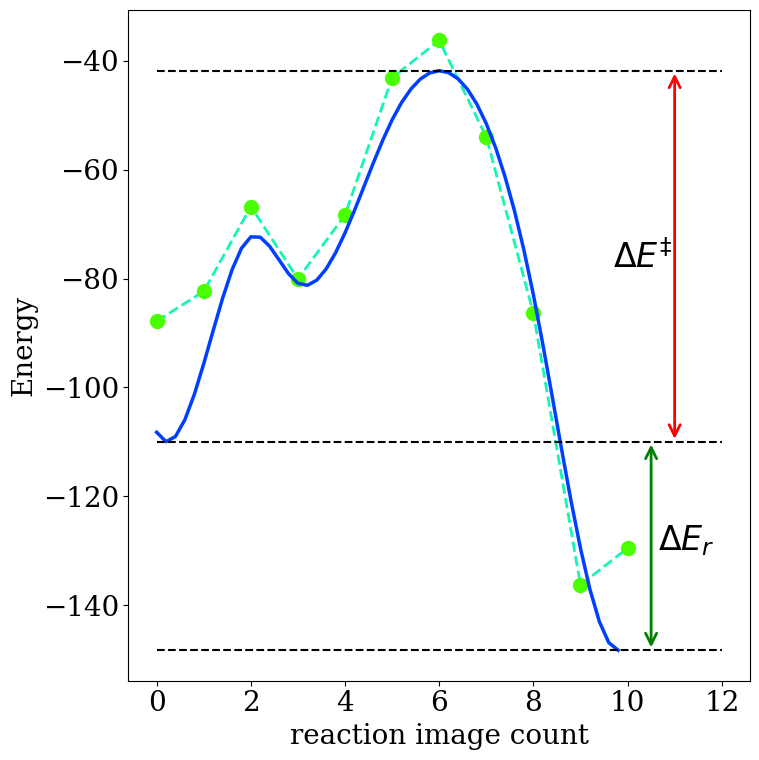

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(np.arange(path_maze_.shape[0]), Z[path_maze_[:, 1], path_maze_[:, 0]], color = "#15f5ba", zorder = 1, linewidth = 2.0, linestyle = 'dashed')
plt.scatter(np.arange(path_maze_.shape[0]), Z[path_maze_[:, 1], path_maze_[:, 0]], color = "#49ff00", zorder = 2, s = 100)

ax.plot(x_new, rxn_profile, lw = 2.5)

plt.hlines([rxn_profile[1], rxn_profile[-1], np.max(rxn_profile)], xmin = 0, xmax = 12, colors = 'black', linestyles = 'dashed')
ax.annotate("", xy=(11, rxn_profile[1]), xytext=(11, np.max(rxn_profile)), 
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color='red', lw = 2),)
plt.text(9.7, -78, r'$\Delta E^‡$', fontsize = 24)
ax.annotate("", xy=(10.5, rxn_profile[1]), xytext=(10.5, rxn_profile[-1]), 
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color='green', lw = 2),)
plt.text(10.65, -130, r'$\Delta E_r$', fontsize = 24)

ax.set_xlabel('reaction image count')
ax.set_ylabel('Energy')
plt.tight_layout()
#plt.savefig('profile_path.png')
plt.show()

In [16]:
# Define the size of the grid
grid_size = 100
x = np.linspace(-1.7, 1.3, grid_size)
y = np.linspace(-0.4, 2.1, grid_size)

# Create the grid
X, Y = np.meshgrid(x, y)

# Define your function to calculate the scalar potential
def scalar_potential2(x, y):
    # For example, let's use a simple function like a Gaussian distribution
    #return 2 * x**2 - y**2
    return ((1 - x**2 - y**2)**2 + (y**2 / (x**2 + y**2))) * (1 + (1 / (1 + np.exp(-y))))

# Define your function to calculate the scalar potential
def scalar_potential(x, y):
    # For example, let's use a simple function like a Gaussian distribution
    #return 2 * x**2 - y**2
    #return ((1 - x**2 - y**2)**2 + (y**2 / (x**2 + y**2))) * (1 + (1 / (1 + np.exp(-y))))
    t_1 = -200 * np.exp((-1.0)*(x - 1.0)**2 + ( 0.0)*(x - 1.0)*(y-0.0) + (-10.0)*(y-0.0)**2)
    t_2 = -100 * np.exp((-1.0)*(x - 0.0)**2 + ( 0.0)*(x - 0.0)*(y-0.5) + (-10.0)*(y-0.5)**2)
    t_3 = -170 * np.exp((-6.5)*(x + 0.5)**2 + (11.0)*(x + 0.5)*(y-1.5) + ( -6.5)*(y-1.5)**2)
    t_4 =   15 * np.exp(( 0.7)*(x + 1.0)**2 + ( 0.6)*(x + 1.0)*(y-1.0) + (  0.7)*(y-1.0)**2)
    
    return (t_1 + t_2 + t_3 + t_4)

# Calculate the scalar potential at each grid point
Z = scalar_potential(X, Y)

# Figure 3a

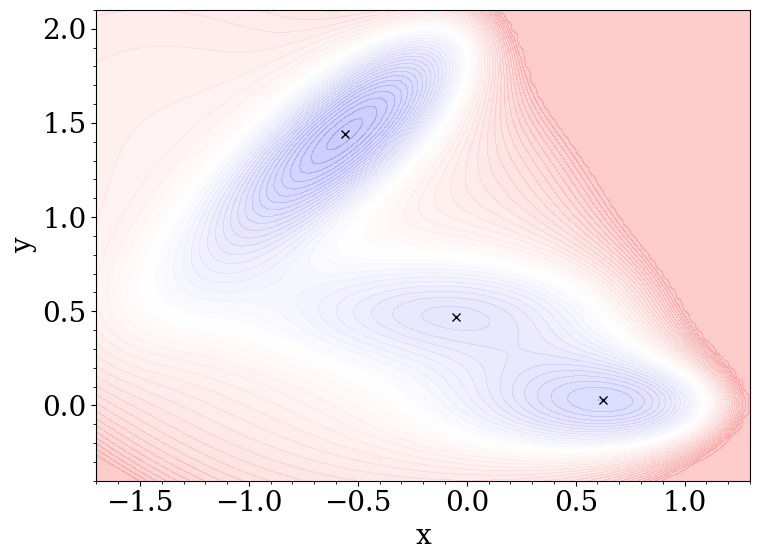

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 50, cmap='bwr', alpha = 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(-0.558, 1.442, 'x', color='black')
plt.plot(0.623, 0.028, 'x', color='black')
plt.plot(-0.050, 0.467, 'x', color='black')
plt.minorticks_on()
plt.tight_layout()
#plt.savefig('pes.png')
plt.show()

In [66]:
numOfRuns = 11
numOfTrajs = 1000
numOfSteps = 501

returns = np.zeros((numOfRuns, numOfTrajs))
for i in range(numOfRuns):
    trajectory = np.zeros((numOfTrajs, numOfSteps, 2))
    for j in range(numOfTrajs):
        traj = np.loadtxt(f'./sac_train/sac_data{i}/states{j}.csv')
        if (traj.shape[0] == 501):
            trajectory[j, :, :] = traj
        else:
            trajectory[j, :traj.shape[0], :] = traj
            trajectory[j, traj.shape[0]:, :] = traj[-1, :]

    returns[i, :] = np.sum(scalar_potential(trajectory[:, :, 0], trajectory[:, :, 1]), axis = -1)

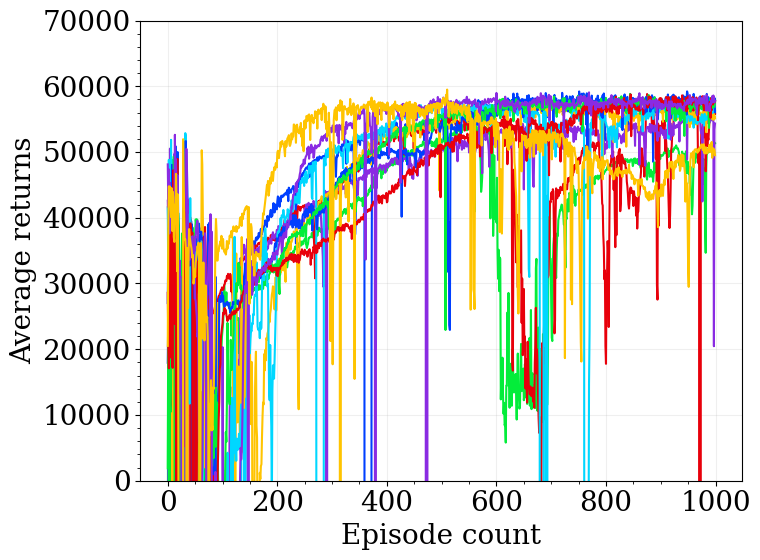

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
episodes = np.arange(returns.shape[1])
ax.plot(episodes, -returns.T)
ax.set_ylim(0, 7e4)

ax.set_xlabel('Episode count')
ax.set_ylabel('Average returns')

plt.tight_layout()
plt.grid(visible = True, alpha = 0.2)
plt.minorticks_on()

plt.show()

In [69]:
mean_returns = np.median(returns, axis = 0)
std_returns = np.std(returns, axis = 0)

# Figure 3b

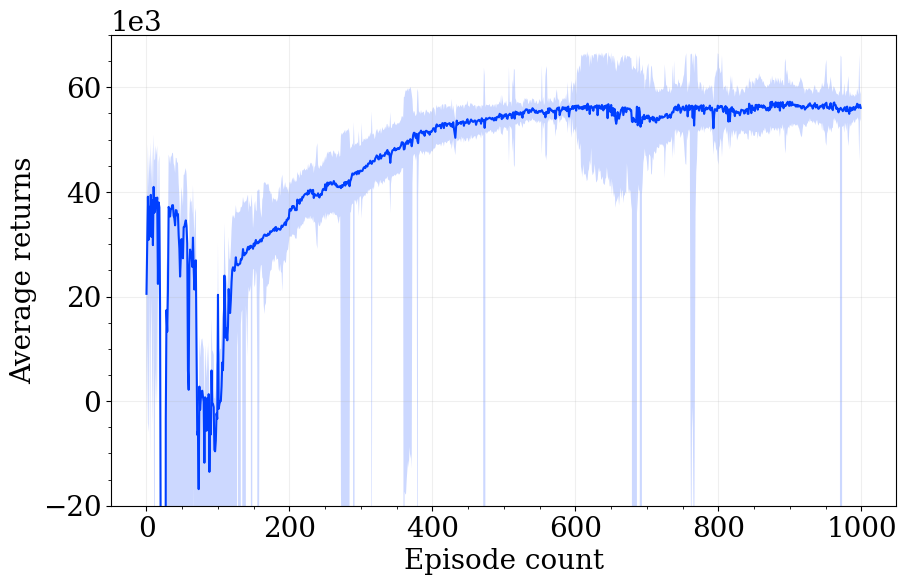

In [70]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
episodes = np.arange(returns.shape[1])
ax.plot(episodes, -mean_returns)
ax.fill_between(episodes, -mean_returns+np.clip(std_returns, 0, 1e4), -mean_returns-std_returns, alpha = 0.2)
#ax.set_xlim(0, 1050)
ax.set_ylim(-2e4, 7e4)

ax.set_xlabel('Episode count')
ax.set_ylabel('Average returns')

plt.tight_layout()
plt.grid(visible = True, alpha = 0.2)
plt.minorticks_on()
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3, 3))

#plt.savefig('learning_curve.png')
plt.show()

In [71]:
numOfTrajs = 1500
trajectory_td3 = np.zeros((numOfTrajs, 1001, 2))

for i in range(numOfTrajs):
    traj = np.loadtxt(f'./algorithms_compare/td3_data/states{i}.csv')
    if (traj.shape[0] == 1001):
        trajectory_td3[i, :, :] = traj
    else:
        trajectory_td3[i, :traj.shape[0], :] = traj
        trajectory_td3[i, traj.shape[0]:, :] = traj[-1]
print(trajectory_td3.shape)

(1500, 1001, 2)


# Figure 4a

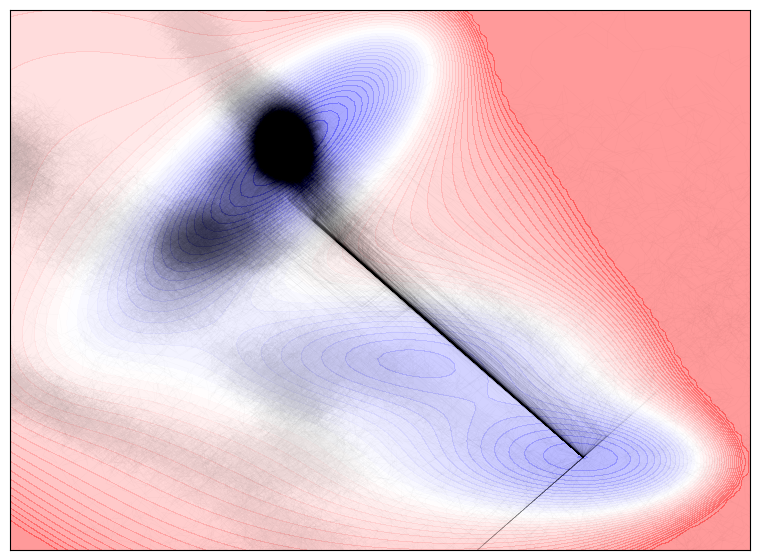

In [72]:
numOfPlots = 1
fig, axs = plt.subplots(numOfPlots, 1, figsize=(8, 6))

for j in range(numOfPlots):
    axs.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 50, cmap='bwr', alpha = 0.4)
    for i in range(1500):
        axs.plot(trajectory_td3[i, :, 0].reshape(-1), trajectory_td3[i, :, 1].reshape(-1),
                    color = 'black', linewidth = 0.4, alpha = 2e-2,)
    axs.set_xlim(-1.7, 1.3)
    axs.set_ylim(-0.4, 2.1)
    axs.set_xticks([])
    axs.set_yticks([])

plt.tight_layout()
#plt.savefig('td3_explore.png')
plt.show()

In [73]:
numOfTrajs = 1100
trajectory_sac = np.zeros((numOfTrajs, 1001, 2))

for i in range(numOfTrajs):
    traj = np.loadtxt(f'./algorithms_compare/sac_data/states{i}.csv')
    if (traj.shape[0] == 1001):
        trajectory_sac[i, :, :] = traj
    else:
        trajectory_sac[i, :traj.shape[0], :] = traj
        trajectory_sac[i, traj.shape[0]:, :] = traj[-1]
print(trajectory_sac.shape)

(1100, 1001, 2)


# Figure 4b

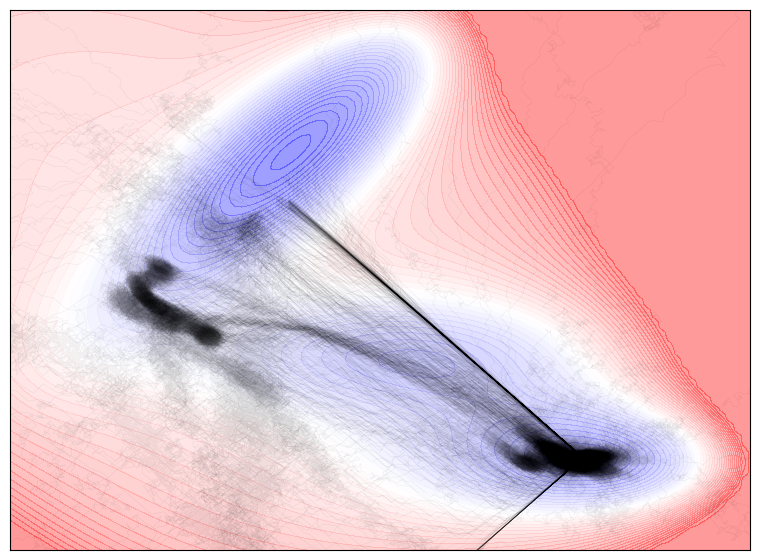

In [74]:
numOfPlots = 1
fig, axs = plt.subplots(numOfPlots, 1, figsize=(8, 6))

for j in range(numOfPlots):
    axs.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 50, cmap='bwr', alpha = 0.4)
    for i in range(1100):
        axs.plot(trajecbtory_sac[i, :, 0].reshape(-1), trajectory_sac[i, :, 1].reshape(-1), 
                    color = 'black', linewidth = 0.5, alpha = 5e-2)
    axs.set_xlim(-1.7, 1.3)
    axs.set_ylim(-0.4, 2.1)
    axs.set_xticks([])
    axs.set_yticks([])

plt.tight_layout()
#plt.savefig('sac_explore.png')
plt.show()

In [18]:
numOfTrajs = 5000
trajectory = np.zeros((numOfTrajs, 301, 2))

for i in range(numOfTrajs):
    traj = np.loadtxt(f'./algorithms_compare/Modified_sac_data/states{i}.csv')
    if (traj.shape[0] == 301):
        trajectory[i, :, :] = traj
    else:
        trajectory[i, :traj.shape[0], :] = traj
        trajectory[i, traj.shape[0]:, :] = traj[-1]
print(trajectory.shape)

(5000, 301, 2)


# Figure 4c

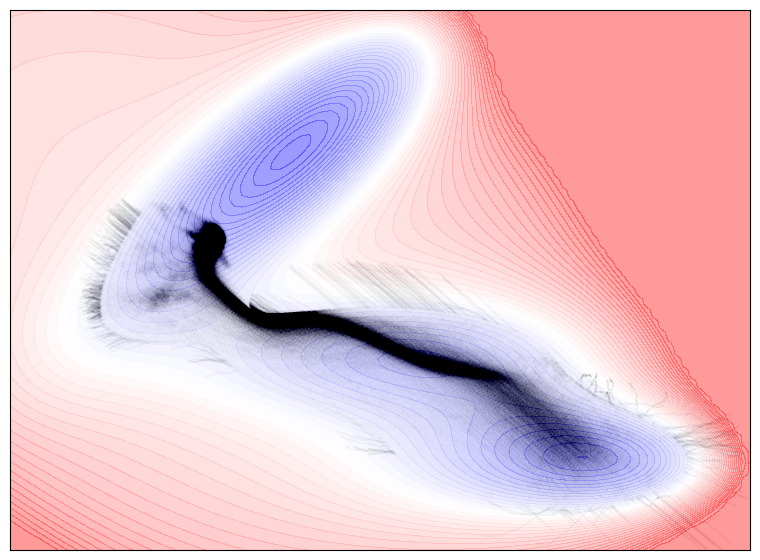

In [19]:
numOfPlots = 1
fig, axs = plt.subplots(numOfPlots, 1, figsize=(8, 6))

for j in range(numOfPlots):
    axs.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 50, cmap='bwr', alpha = 0.4)
    for i in range(5000):
        axs.scatter(trajectory[i, :, 0].reshape(-1), trajectory[i, :, 1].reshape(-1), marker = ',',
                    color = 'black', linewidth = 1e-4, alpha = 5e-3, s = 1)
    axs.set_xlim(-1.7, 1.3)
    axs.set_ylim(-0.4, 2.1)
    axs.set_xticks([])
    axs.set_yticks([])

plt.tight_layout()
#plt.savefig('sac++_explore.png')
plt.show()

In [14]:
numOfTrajs = 209
trajectory_ = np.zeros((numOfTrajs, 301, 2))

for i in range(numOfTrajs):
    traj = np.loadtxt(f'./sac_test/states{i}.csv')
    if (traj.shape[0] == 501):
        trajectory_[i, :, :] = traj
    else:
        trajectory_[i, :traj.shape[0], :] = traj
        trajectory_[i, traj.shape[0]:, :] = traj[-1]
print(trajectory_.shape)

(209, 301, 2)


# Figure 5a

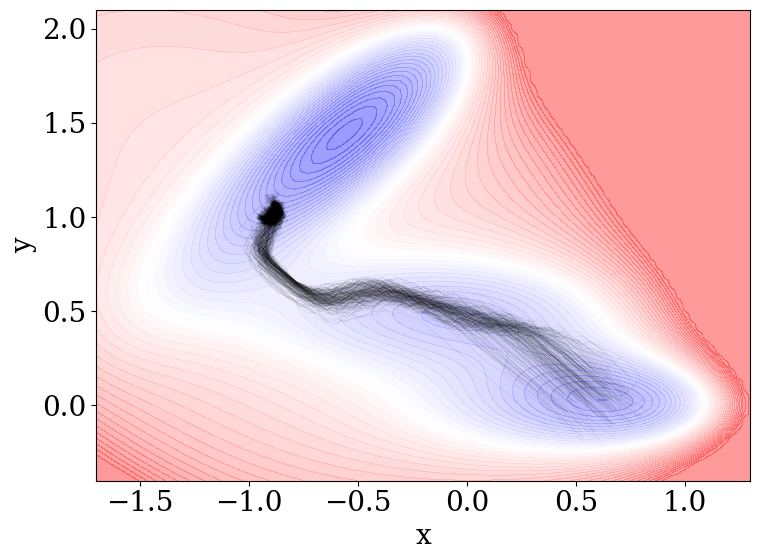

In [4]:
fig, axs = plt.subplots(1, figsize=(8, 6))

axs.contourf(X, Y, np.clip(Z, a_min = Z.min(), a_max = 110), levels = 50, cmap='bwr', alpha = 0.4)
for i in range(numOfTrajs):
    axs.plot(trajectory_[i, :, 0].reshape(-1), trajectory_[i, :, 1].reshape(-1), color = 'black', 
                linewidth = 0.2, alpha = 0.2)
axs.set_xlim(-1.7, 1.3)
axs.set_ylim(-0.4, 2.1)

axs.set_xlabel('x')
axs.set_ylabel('y')

plt.tight_layout()
#plt.savefig('paths.png')
plt.show()

In [15]:
rewards = np.zeros((trajectory_.shape[0], trajectory_.shape[1]))
for i in range(trajectory_.shape[0]):
    rewards[i, :] = scalar_potential(trajectory_[i, :, 0], trajectory_[i, :, 1])
print(rewards.shape)

(209, 301)


# Mean and Standard Deviation of barrier height

In [10]:
heights = []
for i in range(rewards.shape[0]):
    heights.append(np.max(rewards[i, :]))
print(len(heights))
print(np.mean(heights))
print(np.std(heights))

209
-40.363470455964965
0.2067326053530891


# Figure 5b

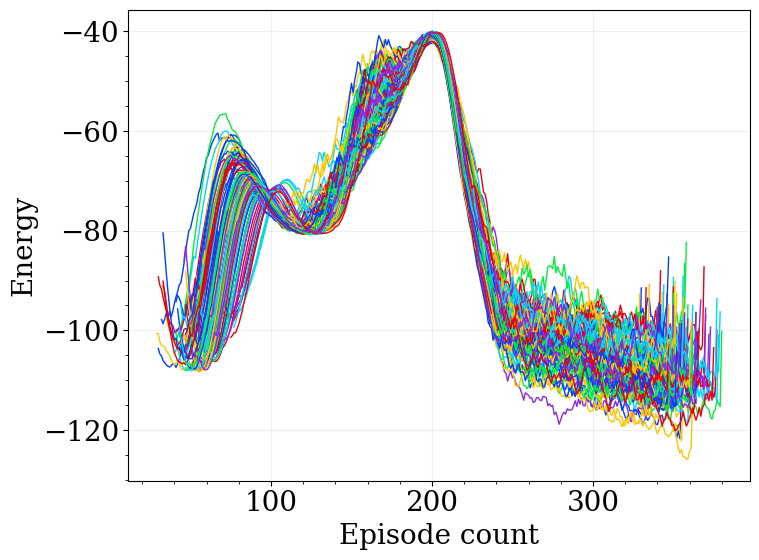

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
episodes = np.arange(rewards.shape[1])

rewards_copy = rewards.copy()

for i in range(rewards.shape[0]):
    if(np.all(rewards_copy[i, :10]<-80) and np.max(rewards_copy[i, :]) > -40.5):
        start = np.argmax(rewards_copy[i, 150:] < -100) + 150
        for j in range(start, rewards_copy.shape[1]-1):
            rewards_copy[i, j] = rewards_copy[i, j] - 1e-1 * (j - start)
        shift = np.argmax(rewards_copy[i, :320]) - 200
        ax.plot(episodes - shift, rewards_copy[i, :320], linewidth = 1.0)

ax.set_xlabel('Episode count')
ax.set_ylabel('Energy')
#ax.set_ylim(-150, -20)
plt.grid(visible = True, alpha = 0.2)
plt.minorticks_on()

plt.tight_layout()
#plt.savefig('profiles.png')
plt.show()

In [17]:
returns_smoothen = np.loadtxt(f'./policy_smoothing/returns_with_smoothing.csv')
returns_no_smoothen = np.loadtxt(f'./policy_smoothing/returns_no_smoothing.csv')

In [21]:
print('With policy smoothing:')
print(np.mean(returns_smoothen[-100:]))
print(np.std(returns_smoothen[-100:]))
print('\n Without policy smoothing:')
print(np.mean(returns_no_smoothen[-100:]))
print(np.std(returns_no_smoothen[-100:]))

With policy smoothing:
-56241.3251434808
453.80360945789835

 Without policy smoothing:
-52985.9209661964
44.26664136105451


# Figure 6b

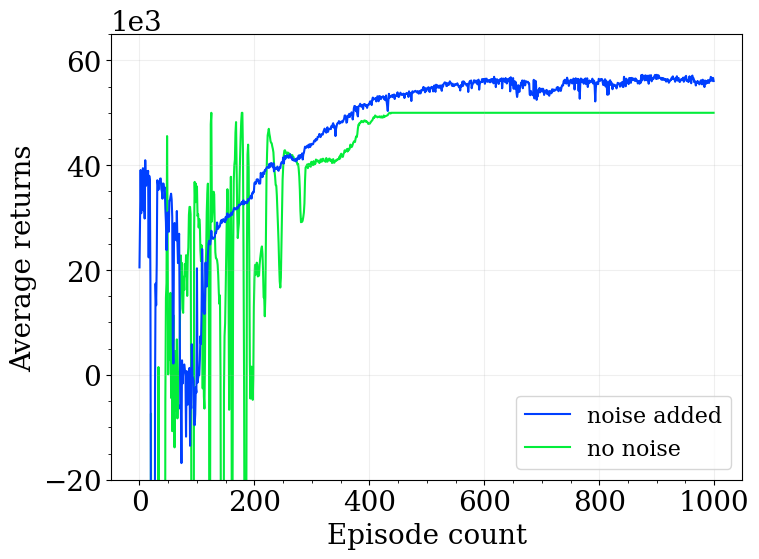

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
episodes = np.arange(returns_smoothen.shape[0])
ax.plot(episodes, -returns_smoothen, label = 'noise added', zorder = 6)
ax.plot(episodes, np.clip(-returns_no_smoothen, -1e5, 5e4), label = 'no noise', zorder = 0)
ax.set_ylim(-2e4, 6.5e4)

ax.set_xlabel('Episode count')
ax.set_ylabel('Average returns')

plt.grid(visible = True, alpha = 0.2)
plt.minorticks_on()
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3, 3))
plt.legend(loc = 'lower right', fontsize = 16)
plt.tight_layout()
#plt.savefig('noise.png')
plt.show()

In [26]:
intervals = [1, 2, 4, 8, 16, 32]
returns_delay_upadtes = np.zeros((len(intervals), 1000))

i = 0
for interval in intervals:
    returns_delay_upadtes[i, :] = np.loadtxt(f'./delayed_updates/returns_delay_{interval}.csv')
    i += 1

In [29]:
for i in range(len(intervals)):
    print('Policy update every ', intervals[i], ' updates :')
    print(np.mean(returns_delay_upadtes[i, -100:]))
    print(np.std(returns_delay_upadtes[i, -100:]))

Policy update every  1  updates :
-28534.782360106794
8137.2779864593
Policy update every  2  updates :
-55438.02743751079
1158.130903368787
Policy update every  4  updates :
-56458.193869566574
809.9912515263024
Policy update every  8  updates :
-56011.508139870835
931.9234038520405
Policy update every  16  updates :
-53666.296001970004
752.38883386895
Policy update every  32  updates :
-29309.227171155206
196.57267000643034


# Figure 6c

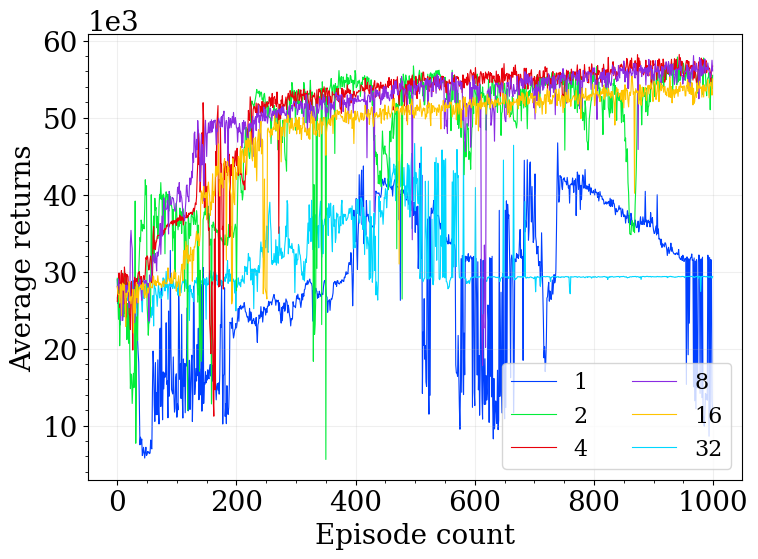

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
episodes = np.arange(returns_delay_upadtes.shape[1])

ax.plot(episodes, -returns_delay_upadtes[0, :], label = '1', zorder = 0, linewidth = 0.8)
ax.plot(episodes, -returns_delay_upadtes[1, :], label = '2', zorder = 2, linewidth = 0.8)
ax.plot(episodes, -returns_delay_upadtes[2, :], label = '4', linewidth = 0.8)
ax.plot(episodes, -returns_delay_upadtes[3, :], label = '8', linewidth = 0.8)
ax.plot(episodes, -returns_delay_upadtes[4, :], label = '16', linewidth = 0.8)
ax.plot(episodes, -returns_delay_upadtes[5, :], label = '32', zorder = 1, linewidth = 0.8)
#ax.set_ylim(0, 6.5e4)

ax.set_xlabel('Episode count')
ax.set_ylabel('Average returns')

plt.grid(visible = True, alpha = 0.2)
plt.minorticks_on()
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3, 3))
plt.legend(loc = 'lower right', fontsize = 16, ncols = 2)
plt.tight_layout()
#plt.savefig('delayed_update.png')
plt.show()

In [30]:
returns_alpha = np.zeros((6, 1000))

returns_alpha[0, :] = np.loadtxt(f'./tunable_alpha/returns_alpha_0.001.csv')
returns_alpha[1, :] = np.loadtxt(f'./tunable_alpha/returns_alpha_0.01.csv')
returns_alpha[2, :] = np.loadtxt(f'./tunable_alpha/returns_alpha_0.1.csv')
returns_alpha[3, :] = np.loadtxt(f'./tunable_alpha/returns_alpha_0.2.csv')
returns_alpha[4, :] = np.loadtxt(f'./tunable_alpha/returns_alpha_0.5.csv')
returns_alpha[5, :] = np.loadtxt(f'./tunable_alpha/returns_alpha_variable.csv')

# Figure 6d

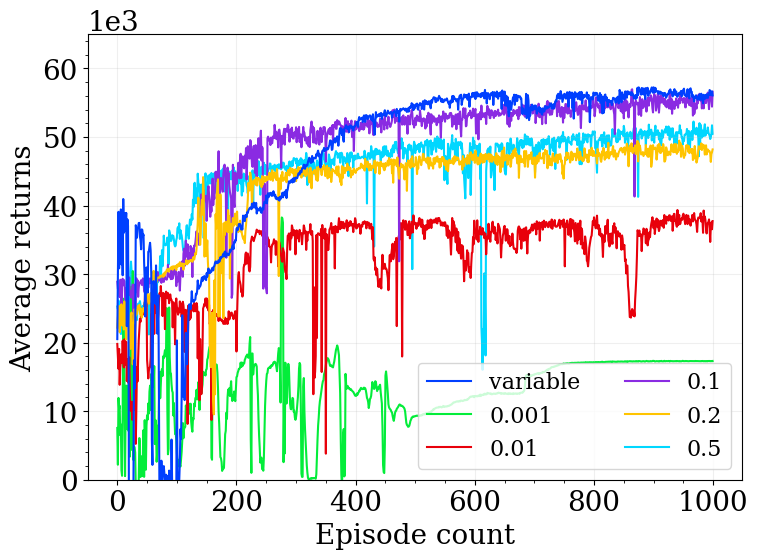

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
episodes = np.arange(returns_alpha.shape[1])
ax.plot(episodes, -returns_alpha[5, :], label = r'variable', zorder = 6)
ax.plot(episodes, -returns_alpha[0, :], label = '0.001')
ax.plot(episodes, -returns_alpha[1, :], label = '0.01')
ax.plot(episodes, -returns_alpha[2, :], label = '0.1')
ax.plot(episodes, -returns_alpha[3, :], label = '0.2')
ax.plot(episodes, -returns_alpha[4, :], label = '0.5', zorder = 0)
ax.set_ylim(0, 6.5e4)

ax.set_xlabel('Episode count')
ax.set_ylabel('Average returns')

plt.grid(visible = True, alpha = 0.2)
plt.minorticks_on()
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3, 3))
plt.legend(loc = 'lower right', fontsize = 16, ncols = 2)
plt.tight_layout()
#plt.savefig('alpha.png')
plt.show()